In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

PART A : Exploratory Data Analysis (EDA)


In [2]:
# Load and display the first 5 rows of the dataset
table = pd.read_csv("housing_data.csv")
table.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Check for missing values
table.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
# Describe the statistical summary (mean, median, min, max) of the dataset.
table.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


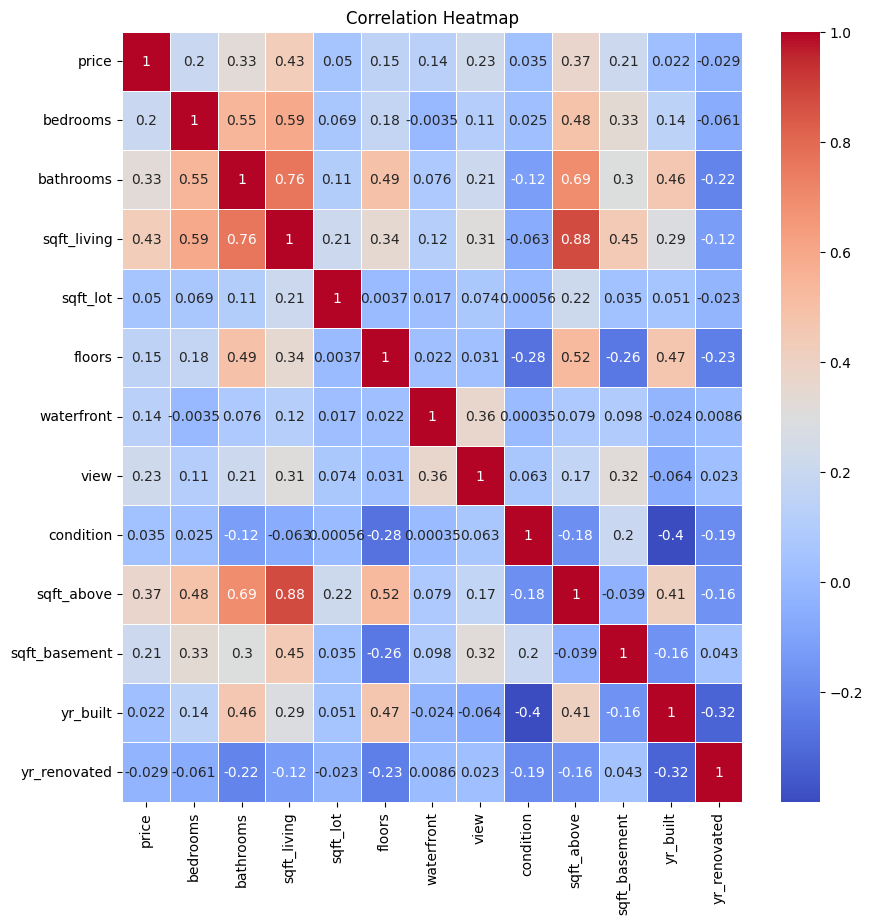

In [5]:
#  Plot a correlation heatmap. Which features have a strong correlation with the target House_Price?
# plt.Figure(10,10)
num = table.select_dtypes(include="number")
corr_matrix = num.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.show()

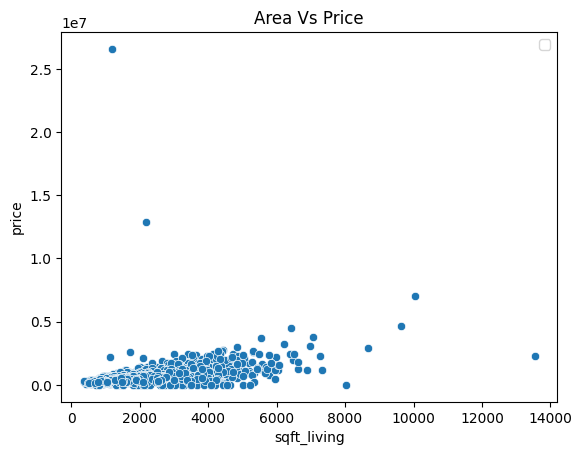

In [6]:
# Visualize the relationship between:
# ○ Area vs House_Price (Scatter plot)
plt.Figure(figsize=(10,15))
sns.scatterplot(x=table["sqft_living"],y=table["price"])
plt.title("Area Vs Price")
plt.legend()
# plt.xlabel("Area")
# plt.ylabel("price")
plt.show()



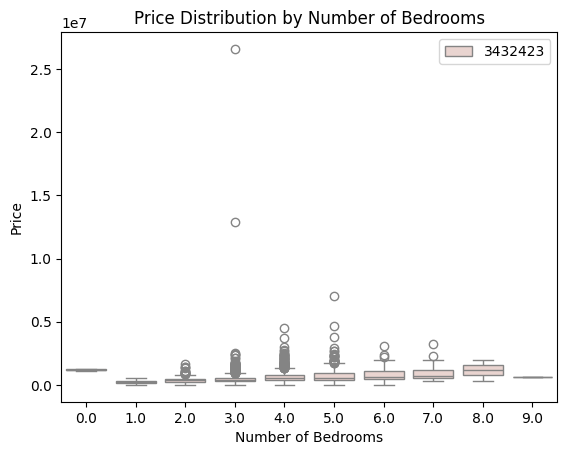

In [7]:
# ○ Bedrooms vs House_Price (Box plot)
sns.boxplot(x=table["bedrooms"], y=table["price"],hue=3432423)
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()


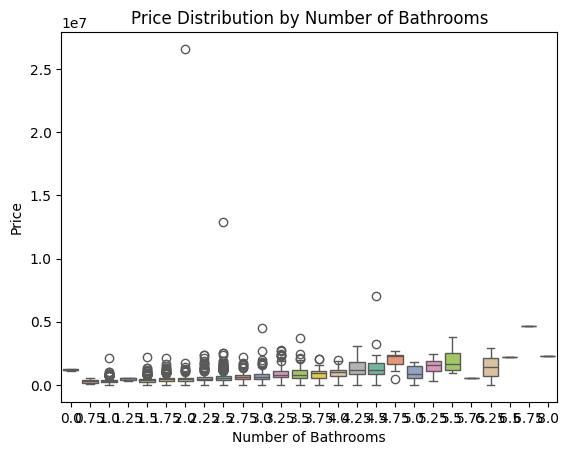

In [8]:
# Bathrooms vs House_Price (Box plot)
plt.Figure(figsize=(8,3))
sns.boxplot(x=table["bathrooms"],y=table["price"],palette="Set2")
plt.title("Price Distribution by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()


<Axes: xlabel='bedrooms', ylabel='price'>

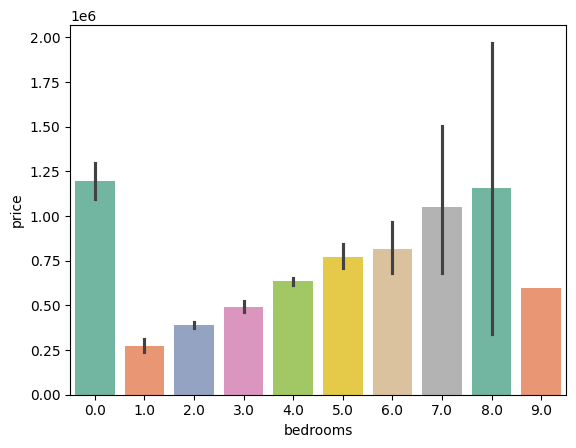

In [9]:
# How does Furnishing_Status affect house price? Use a bar chart to support your answer.
sns.barplot(x=table["bedrooms"],y=table["price"],palette="Set2")


In [10]:
table["statezip"].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

<Axes: xlabel='city', ylabel='price'>

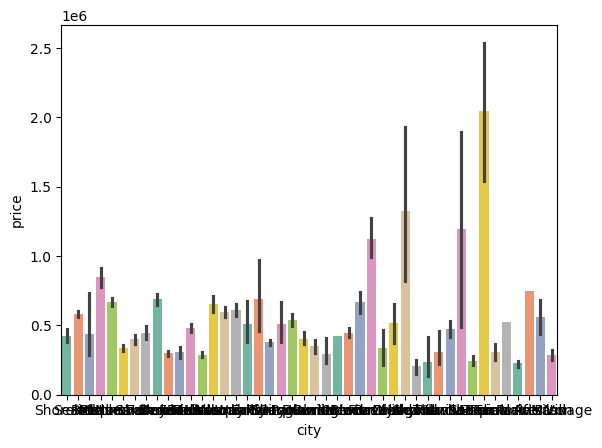

In [11]:
#  Is there a price difference between houses on the main road vs those not? Use abar chart or violin plot.
sns.barplot(x = table["city"],y=table["price"],palette="Set2")


PART B : FEATURE ENGINEERING

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = ["city","statezip"]
for i in table[cat]:
    table[i] = le.fit_transform(table[i])

In [13]:
# Are all features useful for model training? If not, which ones would you drop or
# combine?
updated_table = table.drop(["date", "country","street"], axis=1)
updated_table.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31


PART C : Model Building

In [14]:
# Split the data into training and testing sets. What split ratio did you choose and
# why?
X = updated_table.drop(["price"],axis=1)
Y = updated_table["price"]
from sklearn.model_selection import train_test_split


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)
X_train.shape,X_test.shape
Y_train.shape,Y_test.shape

((3220,), (1380,))

In [16]:
# Train a Linear Regression model. Show the coefficients of each feature and
# interpret their meaning.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
Y_pred = lin_reg.predict(X_test)
Y_pred

array([934946.6840386 , 915275.31866571, 520364.79285193, ...,
       972493.88350202, 873663.17705524, 661763.82008857], shape=(1380,))

In [18]:
r2 = r2_score(Y_test,Y_pred)*100
r2

52.640038184539506